In [48]:
import netCDF4 as nc
import os
try:
    home = '/Users/jucker/'
    os.listdir(home)
except:
    home = '/Users/mjucker/'
progdir = home+'Dropbox/Python/'
repdir  = home+'Repositories/'
datadir = home+'Desktop/'
#datadir = home+'Dropbox/Work/NYU/2015_01_AMS/MiddleAtmosphere/data/runs/'
fileName= 'daily.nc'
plotPsi = False
psiFile = 'psi_daily.nc'
savedir = home+'Downloads/'
fileType= 'png'
nhMonth = 1
shMonth = 7

In [49]:
filelist = [ f for f in os.listdir(savedir) if f.endswith("."+fileType) ]
for f in filelist:
    os.remove(savedir+f)

Plotting style:

In [50]:
%pylab inline
style.use(['fivethirtyeight',progdir+'presentation.mplstyle'])

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


Now, get the data from this file:
- Coordinates:

In [51]:
file = nc.Dataset(datadir+fileName)
pres = file.variables['pfull'][:]
lonAvg = not 'lon' in file.dimensions
lat  = file.variables['lat'][:]
time = file.variables['time'][:]
if max(time) > 100000:
    yrs = time/86400/360
elif max(time) > 100:
    yrs = time/360
Jtrop = find(abs(lat)<=15)
JSpol = find(lat<=-70)
JNpol = find(lat>= 70)
plevs = [100,70,20,10,1,0.1]
K = []
for k in plevs:
    K.append(abs(pres-k).argmin())
I = find(pres<=100)

- Zonal means of the fields:

In [52]:
do_u = 'ucomp' in file.variables
do_t = 'temp' in file.variables
do_q = 'sphum' in file.variables
do_rh = 'rh' in file.variables
do_prec = 'precip' in file.variables
do_ts = 't_surf' in file.variables
if lonAvg:
    if do_u: u   = file.variables['ucomp'][:]
    if do_t: t   = file.variables['temp'][:]
    if do_q:
        q   = file.variables['sphum'][:]
        qa = q.mean(axis=0)
        dq = q - qa
    if do_rh: rh  = file.variables['rh'][:]
    if do_prec: prec= file.variables['precip'][:]
    if do_ts: ts  = file.variables['t_surf'][:]
else:
    if do_u: u   = file.variables['ucomp'][:].mean(axis=-1)
    if do_t: t   = file.variables['temp'][:].mean(axis=-1)
    if do_q:
        q   = file.variables['sphum'][:].mean(axis=-1)
        qa = q.mean(axis=0)
        dq = q - qa
    if do_rh: rh  = file.variables['rh'][:].mean(axis=-1)
    if do_prec: prec= file.variables['precip'][:].mean(axis=-1)
    if do_ts: ts  = file.variables['t_surf'][:].mean(axis=-1)

In [53]:
try:
    cz  = file.variables['coszen'][:]
    if  not lonAvg:
        cz = cz.mean(axis=-1)
    print 'read coszen'
except:
    pass

In [54]:
try:
    fsw  = file.variables['flux_sw'][:]
    if not lonAvg:
        fsw = fsw.mean(axis=-1)
    print 'read flux_sw'
except:
    pass

read flux_sw


In [55]:
file.close()

Compute global mean SST:

In [56]:
coslat= cos(lat*pi/180)
if do_ts:
    sstm1 = (coslat*ts[-1,:]).mean()/coslat.mean()
    sstm1 = int(sstm1*10)/10.
    sstgb = (coslat[newaxis,:]*ts).mean(axis=0)
    sstgb = sstgb.mean()/coslat.mean()
    sstgb = int(sstgb*10)/10.

In [57]:
if plotPsi:
    filep = nc.Dataset(datadir+psiFile)
    psi = filep.variables['psi_star'][:]
    filep.close()

Creating climatologies:

In [58]:
execfile(repdir+'pv_tools/'+'climate.py')
#try:
ComputeClimate(datadir+fileName,'monthly')
ComputeClimate(datadir+fileName,'daily')
filem = nc.Dataset(datadir+fileName[:-3]+'_monthly.nc')
filed = nc.Dataset(datadir+fileName[:-3]+'_daily.nc')
days = filed.variables['time'][:]
if lonAvg:
    if do_u: um  = filem.variables['ucomp'][:]
    if do_t:
        tm  = filem.variables['temp'][:]
        td  = filed.variables['temp'][:]
    if do_rh: rhm = filem.variables['rh'][:]
    if do_q:
        qm  = filem.variables['sphum'][:]
        qd  = filed.variables['sphum'][:]
    if do_ts:
        sstm= filem.variables['t_surf'][:]
        sstd= filed.variables['t_surf'][:]
else:
    if do_u: um  = filem.variables['ucomp'][:].mean(axis=-1)
    if do_t:
        tm  = filem.variables['temp'][:].mean(axis=-1)
        td  = filed.variables['temp'][:].mean(axis=-1)
    if do_rh: rhm = filem.variables['rh'][:].mean(axis=-1)
    if do_q:
        qm  = filem.variables['sphum'][:].mean(axis=-1)
        qd  = filed.variables['sphum'][:].mean(axis=-1)
    if do_ts:
        sstm= filem.variables['t_surf'][:].mean(axis=-1)
        sstd= filed.variables['t_surf'][:].mean(axis=-1)
if plotPsi:
    ComputeClimate(datadir+psiFile,'monthly')
    filep = nc.Dataset(datadir+psiFile[:-3]+'_monthly.nc')
    psim = filep.variables['psi_star'][:]
    filep.close()

The time dimension is in units of seconds , with a time step of 5.0 days
The simulation is 3600.0 days long, which I assume means 10.0 years of 360 days.
Averaging variables:
                      flux_sw
                      precip
                      ps
                      rh
                      sphum
                      t_surf
                      temp
                      time_bounds
                      ucomp
DONE, wrote file //Users/mjucker/Desktop/daily_monthly.nc
The time dimension is in units of seconds , with a time step of 5.0 days
The simulation is 3600.0 days long, which I assume means 10.0 years of 360 days.
Averaging variables:
                      flux_sw
                      precip
                      ps
                      rh
                      sphum
                      t_surf
                      temp
                      time_bounds
                      ucomp
DONE, wrote file //Users/mjucker/Desktop/daily_daily.nc


In [59]:
try:
    czm = filem.variables['coszen'][:]
    if not lonAvg:
        czm = czm.mean(axis=-1)
except:
    pass

In [60]:
try:
    fswm = filem.variables['flux_sw'][:]
    if not lonAvg:
        fswm = fswm.mean(axis=-1)
except:
    pass

In [61]:
try:
    filem.close()
except:
    pass

# Plotting
## Full time dependence

In [62]:
#rcParams['figure.figsize'] = (16.0, 9.0)
style.use([progdir+'notebook.mplstyle',progdir+'contourfstyle.mplstyle'])
latticks=linspace(-90,90,13);

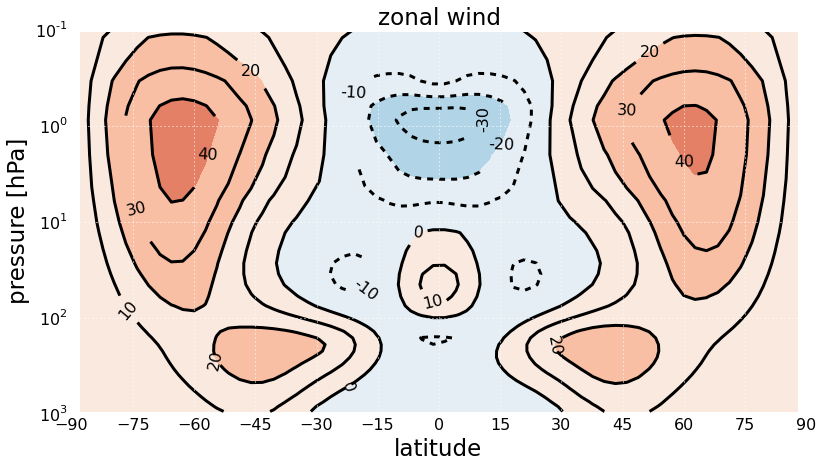

In [63]:
if do_u:
    figure()
    contourf(lat,pres,u.mean(axis=0),linspace(-100,100,11),cmap='RdBu_r')
    cs = contour(lat,pres,u.mean(axis=0),linspace(-100,100,21),colors='black',linewidth=1)
    clabel(cs,fmt='%g')
    ylim(1000,0.1)
    yscale('log')
    ylabel('pressure [hPa]')
    xticks(latticks)
    xlabel('latitude')
    title('zonal wind')
    savefig(savedir+'u_avg.'+fileType)

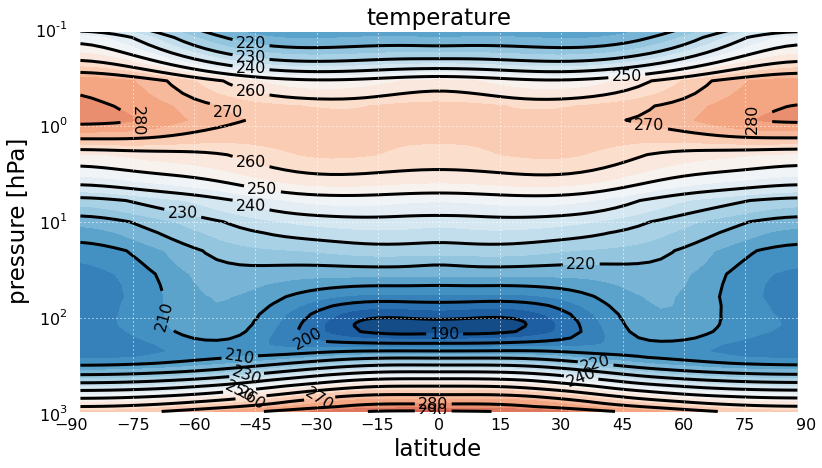

In [64]:
if do_t:
    figure()
    contourf(lat,pres,t.mean(axis=0),linspace(180,320,29),cmap='RdBu_r')
    cs = contour(lat,pres,t.mean(axis=0),linspace(180,320,15),colors='black',linewidth=1)
    clabel(cs,fmt='%g')
    ylim(1000,0.1)
    yscale('log')
    ylabel('pressure [hPa]')
    xticks(latticks)
    xlabel('latitude')
    title('temperature')
    savefig(savedir+'t_avg.'+fileType)

In [65]:
xt=[]
for y in range(int(floor(min(yrs))),int(ceil(max(yrs)))+1):
    xt.append(y)

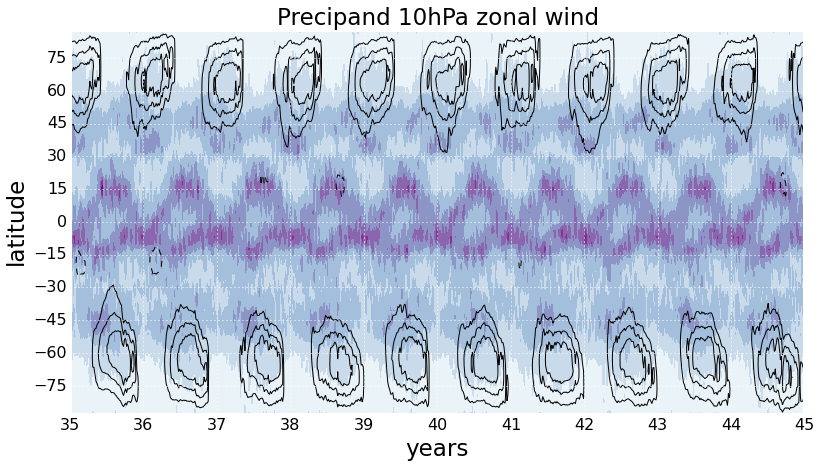

In [66]:
if do_prec:
    figure()
    contourf(yrs,lat,prec.T,cmap='BuPu')
    xlim(xt[0],xt[-1])
    xticks(xt)
    xlabel('years')
    yticks(latticks)
    ylabel('latitude')
    ttle = 'Precip'
    flenm= 'prec'
    if do_u:
        kk = abs(pres-10).argmin()
        contour(yrs,lat,u[:,kk,:].T,[-60,-40,-20,20,40,60],linewidths=1,colors='black')
        ttle = ttle+'and 10hPa zonal wind'
        flenm= flenm+'_u'
    title(ttle)
    flenm = flenm+'.'
    savefig(savedir+flenm+fileType)

In [67]:
try:
    #figure()
    contourf(yrs,lat,cz.T,cmap='Reds')
    xlim(xt[0],xt[-1])
    xticks(xt);
    xlabel('years')
    yticks(latticks)
    ylabel('latitude')
    title('coszen')
    savefig(savedir+'coszen.'+fileType)
except:
    pass

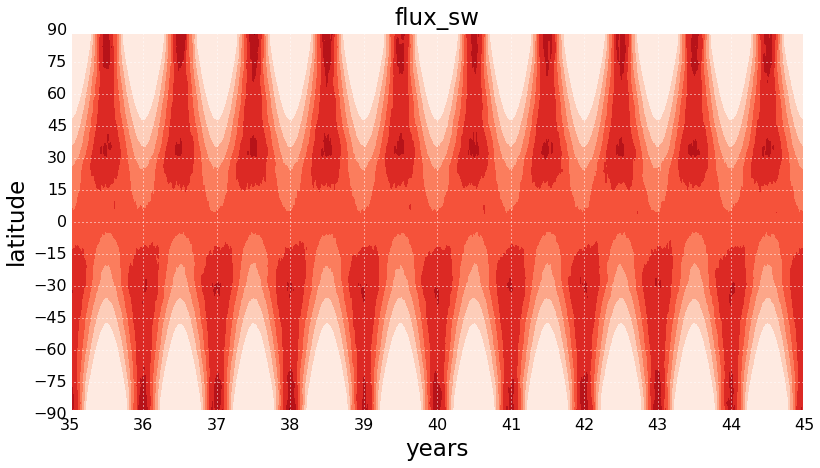

In [68]:
try:
    #figure()
    contourf(yrs,lat,fsw.T,cmap='Reds')
    xlim(xt[0],xt[-1])
    xticks(xt);
    xlabel('years')
    yticks(latticks)
    ylabel('latitude')
    title('flux_sw')
    savefig(savedir+'flux_sw.'+fileType)
except:
    pass

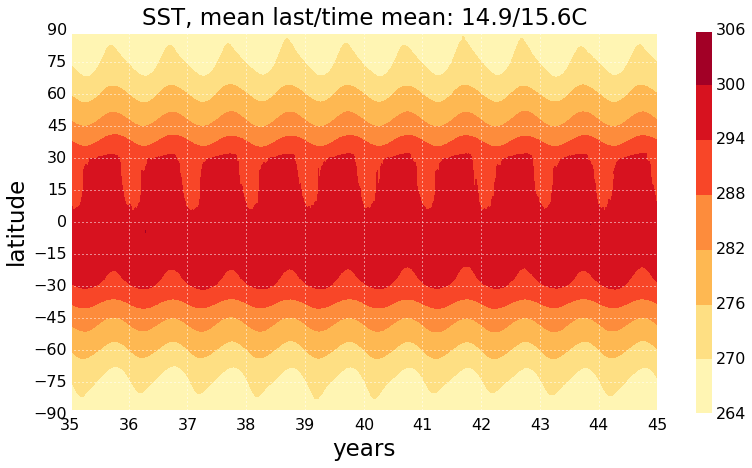

In [69]:
if do_ts:
    fig,ax = subplots()
    contourf(yrs,lat,ts.T,cmap='YlOrRd')
    xlim(xt[0],xt[-1])
    xticks(xt)
    xlabel('years')
    yticks(latticks)
    ylabel('latitude')
    colorbar()
    #kk = abs(pres-250).argmin()
    #contour(yrs,lat,u[:,kk,:].T,[-30,-20,-10,10,20,30],linewidths=1,colors='black')
    title('SST, mean last/time mean: '+str(sstm1-273)+'/'+str(sstgb-273)+'C');
    savefig(savedir+'sst.'+fileType)

In [70]:
style.use(['fivethirtyeight',progdir+'presentation.mplstyle'])

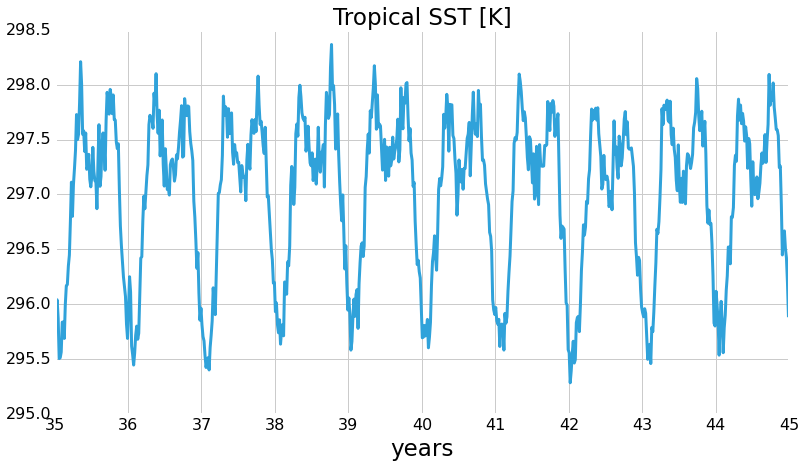

In [71]:
if do_ts:
    figure()
    plot(yrs,ts[:,Jtrop].mean(axis=-1))
    xlim(xt[0],xt[-1])
    xticks(xt)
    xlabel('years')
    #ylabel('SST [K]')
    title('Tropical SST [K]')
    savefig(savedir+'sst_trop.'+fileType)

In [72]:
if do_q:
    qt = q[:,:,Jtrop].mean(axis=-1)
    dqt = dq[:,:,Jtrop].mean(axis=-1)
if do_rh:
    rht = rh[:,:,Jtrop].mean(axis=-1)
    rhSp = rh[:,:,JSpol].mean(axis=-1)
    rhNp = rh[:,:,JNpol].mean(axis=-1)
if do_t:
    tt = t[:,:,Jtrop].mean(axis=-1)

In [73]:
from itertools import cycle,islice
lines = 5*["-"] + 5*["--"]
#lines = ["-","--","-.",":"]

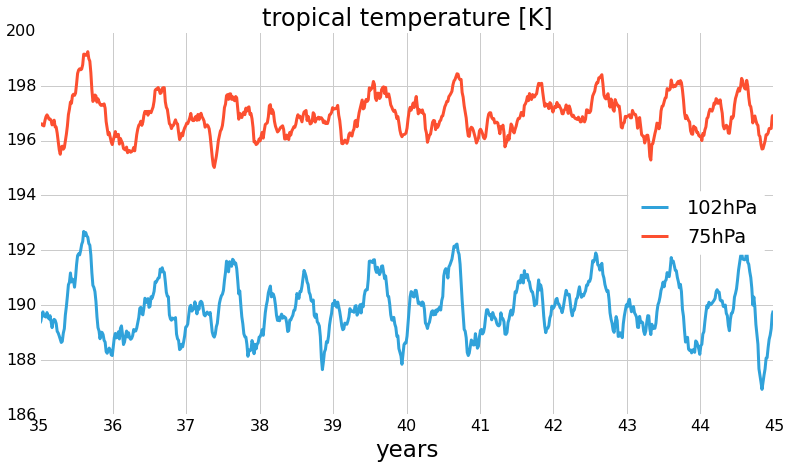

In [74]:
if do_t:
    figure()
    linecycler = cycle(lines)
    for k in K[:2]:
        plot(yrs,tt[:,k],linestyle=next(linecycler),label=str(int(pres[k]))+'hPa')
    legend(loc='best')
    title('tropical temperature [K]',fontsize=24)
    yscale('linear')
    xlim(xt[0],xt[-1])
    xticks(xt)
    xlabel('years')
    #ylabel('temperature [K]')
    savefig(savedir+'t_trop.'+fileType)

In [75]:
#kk = abs(pres-100).argmin()
#figure()
#plot(yrs,tt[:,kk])
#xlim(xt[0],xt[-1])
#xticks(xt)
#xlabel('years')
#title('Cold point temperature [K]')
#savefig(savedir+'cpt.png')

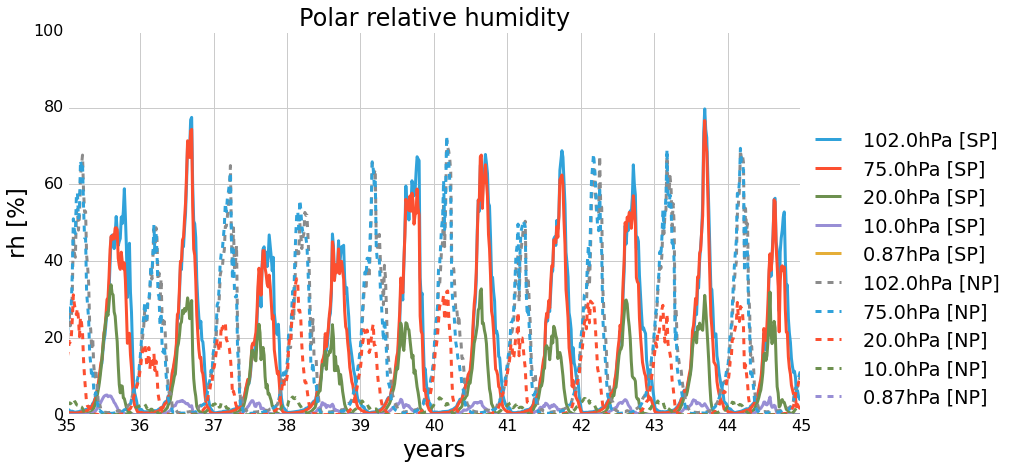

In [76]:
if do_rh:
    figure()
    linecycler = cycle(lines)
    for k in K[:-1]:
        plot(yrs,rhSp[:,k],linestyle=next(linecycler),label=str(pres[k])+'hPa [SP]')
    for k in K[:-1]:
        plot(yrs,rhNp[:,k],linestyle=next(linecycler),label=str(pres[k])+'hPa [NP]')
    lgd = legend(loc=(1,0))
    title('Polar relative humidity',fontsize=24)
    yscale('linear')
    xlim(xt[0],xt[-1])
    xticks(xt)
    xlabel('years')
    ylabel('rh [%]')
    ylim((0,100))
    savefig(savedir+'rh_pol.'+fileType,bbox_extra_artists=(lgd,), bbox_inches='tight')

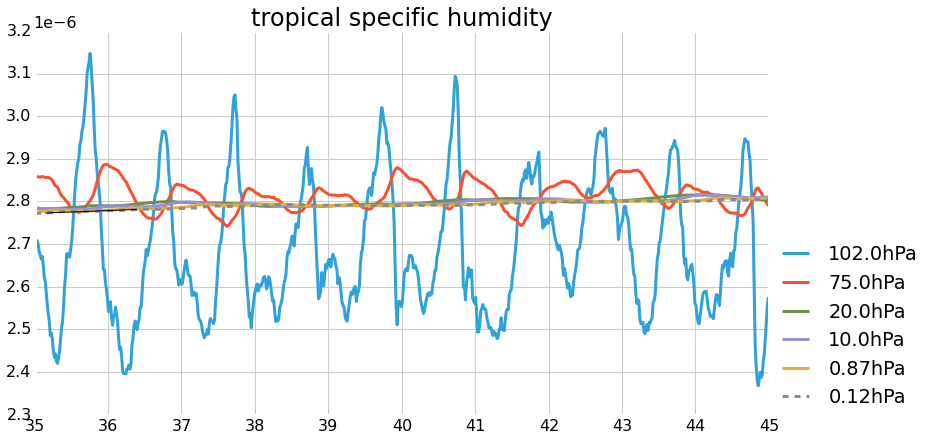

In [77]:
if do_q:
    start=10;end=100
    if (q.min() > 10):
        subplot(2,1,1)
        suptitle('tropical specific humidity',fontsize=24)
    else:
        figure()
        title('tropical specific humidity',fontsize=24)
    linecycler = cycle(lines)
    for k in K:
        plot(yrs,qt[:,k],linestyle=next(linecycler),label=str(pres[k])+'hPa')
    lgd=legend(loc=(1,0))
    if (q.min() > 10):
        title('linear',fontsize=16)
    yscale('linear')
    xlim(xt[0],xt[-1])
    xticks(xt)
    #ylabel('specific humidity')
    plot([yrs[start],yrs[end]],[qt[start,k],qt[end,k]],'black',linewidth=1)
    if (q.min() > 10):
        subplot(2,1,2)
        linecycler = cycle(lines)
        for k in K:
            plot(yrs,qt[:,k],linestyle=next(linecycler),label=str(pres[k])+'hPa')
        yscale('log')
        xlim(xt[0],xt[-1])
        xticks(xt)
        xlabel('years')
        ylabel('specific humidity')
        title('log10',fontsize=16)
        plot([yrs[start],yrs[end]],[qt[start,k],qt[end,k]],'black',linewidth=1)
    savefig(savedir+'tape.'+fileType,bbox_extra_artists=(lgd,), bbox_inches='tight')

In [78]:
if do_q:
    kk = abs(pres-100).argmin()
    print 'Linear:',(qt[end,kk]-qt[start,kk])/(yrs[end]-yrs[start]),'/yr'
    print 'Log10 :',(log10(qt[end,kk])-log10(qt[start,kk]))/(yrs[end]-yrs[start]),'/yr'
    print 'Ln    :',(log(qt[end,kk])-log(qt[start,kk]))/(yrs[end]-yrs[start]),'/yr'

Linear: -9.11737515708e-08 /yr
Log10 : -0.0154903411865 /yr
Ln    : -0.0356674194336 /yr


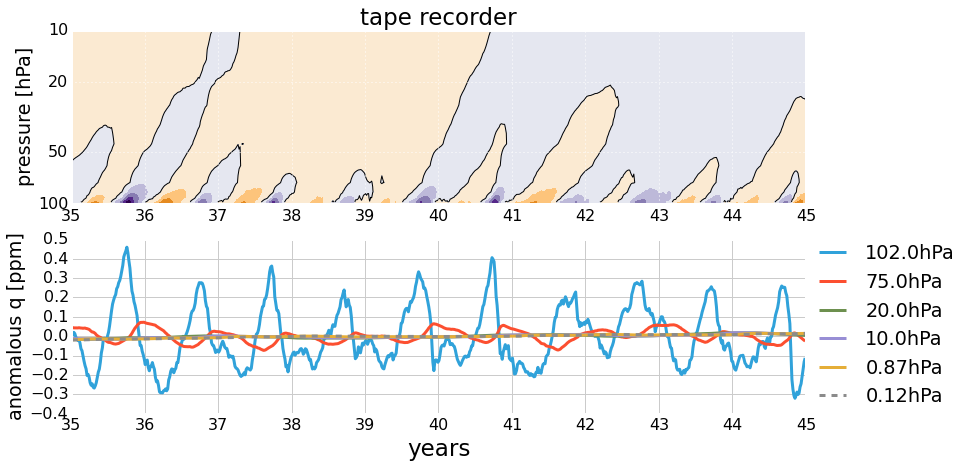

In [79]:
if do_q:
    style.use([progdir+'notebook.mplstyle',progdir+'contourfstyle.mplstyle'])
    subplot(2,1,1)
    dqtm = abs(dqt[:,I]).max()
    contourf(yrs,pres[I],dqt[:,I].T,vmin=-dqtm,vmax=dqtm,cmap='PuOr')
    contour(yrs,pres[I],dqt[:,I].T,[0],linewidths=1,colors='black')
    xlim(xt[0],xt[-1])
    xticks(xt)
    yscale('log')
    ylim(100,10);
    ytickpos = [100,50,20,10]
    yticklab=[]
    for t in range(len(ytickpos)):
      yticklab.append(str(ytickpos[t]))  
    yticks([100,50,20,10],yticklab);
    ylabel('pressure [hPa]',fontsize='large')
    title('tape recorder')
    style.use(['fivethirtyeight',progdir+'presentation.mplstyle'])
    subplot(2,1,2)
    linecycler = cycle(lines)
    for k in K:
        plot(yrs,dqt[:,k]*1e6,linestyle=next(linecycler),label=str(pres[k])+'hPa')
    xlim(xt[0],xt[-1])
    xticks(xt)
    xlabel('years')
    ylabel('anomalous q [ppm]',fontsize='large')
    lgd=legend(loc=(1,0))
    savefig(savedir+'tape2.'+fileType,bbox_extra_artists=(lgd,), bbox_inches='tight')

## Climatologies

In [80]:
execfile(progdir+'plotting.py') #to plot monthly 2D climatologies
style.use([progdir+'notebook.mplstyle',progdir+'contourfstyle.mplstyle'])

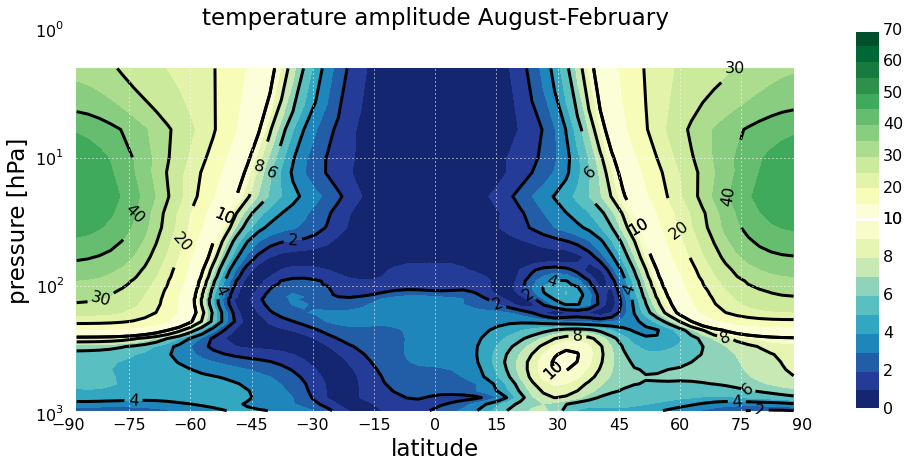

In [81]:
monthNames = ['January','February','March','April','May','June','July','August','September','October','November','December']
# temperature amplitude
if do_t:
    #tamp = td.max(axis=0) - td.min(axis=0)
    tamp = abs(tm[shMonth,:]-tm[nhMonth,:])
    figure()
    #plotamp = concatenate((arange(11),arange(15,75,5)))
    plotamp = arange(11)
    Itmp = find(pres>=1)
    cf1 = contourf(lat,pres[Itmp],tamp[Itmp,:],plotamp,cmap='YlGnBu_r')
    cs = contour(lat,pres[Itmp],tamp[Itmp,:],plotamp[::2],colors='black',linewidth=1)
    clabel(cs,fmt='%g')
    plotamp = arange(10,75,5)
    cf2 = contourf(lat,pres[Itmp],tamp[Itmp,:],plotamp,cmap='YlGn')
    cs = contour(lat,pres[Itmp],tamp[Itmp,:],plotamp[::2],colors='black',linewidth=1)
    clabel(cs,fmt='%g')
    ylim(1000,1)
    yscale('log')
    ylabel('pressure [hPa]')
    xticks(latticks)
    xlabel('latitude')
    title('temperature amplitude '+monthNames[shMonth]+'-'+monthNames[nhMonth])
    posvec = [1.01, 0.12, 0.03, 0.39]
    cbpos = axes(posvec)
    colorbar(cf1,cax=cbpos)
    posvec[1] = posvec[1]+posvec[-1]
    cbpos = axes(posvec)
    colorbar(cf2,cax=cbpos)
    savefig(savedir+'t_amp.'+fileType, bbox_inches='tight')

In [82]:
ComputeClimate(datadir+fileName,'DJF')
ComputeClimate(datadir+fileName,'JJA')

The time dimension is in units of seconds , with a time step of 5.0 days
The simulation is 3600.0 days long, which I assume means 10.0 years of 360 days.
Averaging variables:
                      flux_sw
                      precip
                      ps
                      rh
                      sphum
                      t_surf
                      temp
                      time_bounds
                      ucomp
DONE, wrote file //Users/mjucker/Desktop/daily_DJF.nc
The time dimension is in units of seconds , with a time step of 5.0 days
The simulation is 3600.0 days long, which I assume means 10.0 years of 360 days.
Averaging variables:
                      flux_sw
                      precip
                      ps
                      rh
                      sphum
                      t_surf
                      temp
                      time_bounds
                      ucomp
DONE, wrote file //Users/mjucker/Desktop/daily_JJA.nc


'//Users/mjucker/Desktop/daily_JJA.nc'

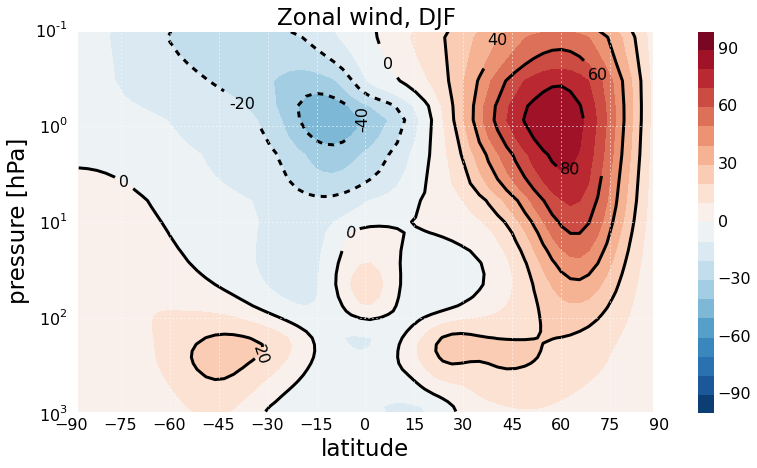

In [83]:
if do_u:
    filetmp = nc.Dataset(datadir+fileName[:-3]+'_DJF.nc')
    utmp = filetmp.variables['ucomp'][:]
    #subplot(1,2,1)
    contourf(lat,pres,utmp,linspace(-100,100,21),cmap='RdBu_r')
    colorbar()
    cs=contour(lat,pres,utmp,linspace(-100,100,11),colors='black')
    clabel(cs,fmt='%g')
    xticks(latticks)
    xlabel('latitude')
    ylabel('pressure [hPa]')
    yscale('log')
    ylim((1000,0.1))
    title('Zonal wind, DJF')
    savefig(savedir+'u_djf.'+fileType, bbox_inches='tight')
    filetmp.close()
    #
    #filetmp = nc.Dataset(datadir+fileName[:-3]+'_JJA.nc')
    #utmp = filetmp.variables['ucomp'][:]
    #subplot(1,2,2)
    #contourf(lat,pres,utmp,linspace(-100,100,21),cmap='RdBu_r')
    ##colorbar()
    #cs=contour(lat,pres,utmp,linspace(-100,100,11),colors='black')
    #clabel(cs,fmt='%g')
    #xticks(latticks)
    #xlabel('latitude')
    ##ylabel('pressure [hPa]')
    #yscale('log')
    #ylim((1000,0.1))
    #title('Zonal wind, JJA')
    #savefig(savedir+'u_djf_jja.'+fileType, bbox_inches='tight')
    #filetmp.close()

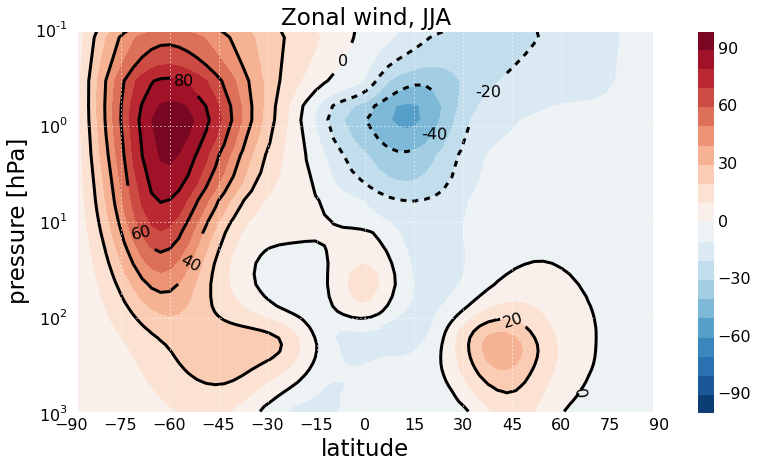

In [84]:
if do_u:
    filetmp = nc.Dataset(datadir+fileName[:-3]+'_JJA.nc')
    utmp = filetmp.variables['ucomp'][:]
    contourf(lat,pres,utmp,linspace(-100,100,21),cmap='RdBu_r')
    colorbar()
    cs=contour(lat,pres,utmp,linspace(-100,100,11),colors='black')
    clabel(cs,fmt='%g')
    xticks(latticks)
    xlabel('latitude')
    ylabel('pressure [hPa]')
    yscale('log')
    ylim((1000,0.1))
    title('Zonal wind, JJA')
    savefig(savedir+'u_jja.'+fileType, bbox_inches='tight')
    filetmp.close()

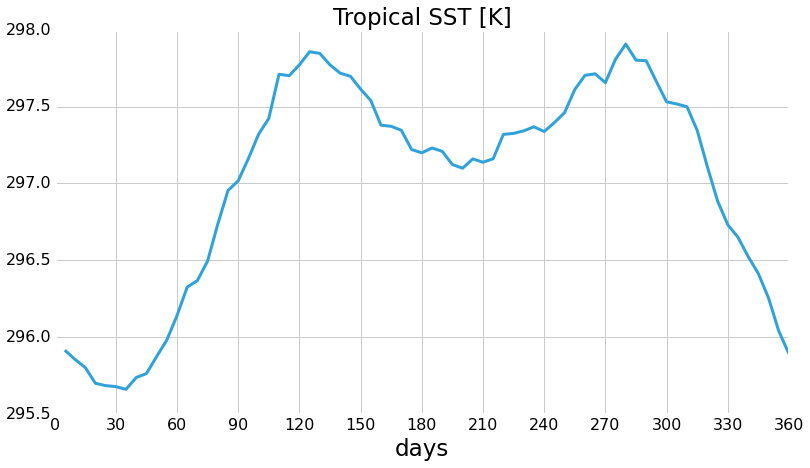

In [85]:
style.use(['fivethirtyeight',progdir+'presentation.mplstyle'])
if do_ts:
    figure()
    plot(days,sstd[:,Jtrop].mean(axis=-1))#,'-o')
    xlabel('days')
    xticks(linspace(0,360,13))
    xlim(0,360)
    #ylabel('SST [K]')
    title('Tropical SST [K]')
    savefig(savedir+'sst_trop_clim.'+fileType, bbox_inches='tight')

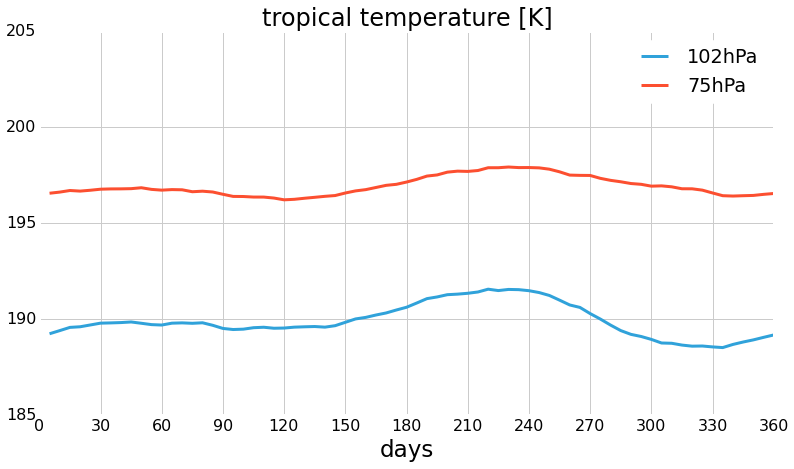

In [86]:
if do_t:
    figure()
    linecycler = cycle(lines)
    for k in K[:2]:
        plot(days,td[:,k,Jtrop].mean(axis=-1),linestyle=next(linecycler),label=str(int(pres[k]))+'hPa')
    legend(loc='best')
    title('tropical temperature [K]',fontsize=24)
    yscale('linear')
    xlim(0,360)
    xticks(linspace(0,360,13))
    xlabel('days')
    #ylabel('temperature [K]')
    ylim(185,205)
    savefig(savedir+'t_ttl_clim.'+fileType, bbox_inches='tight')

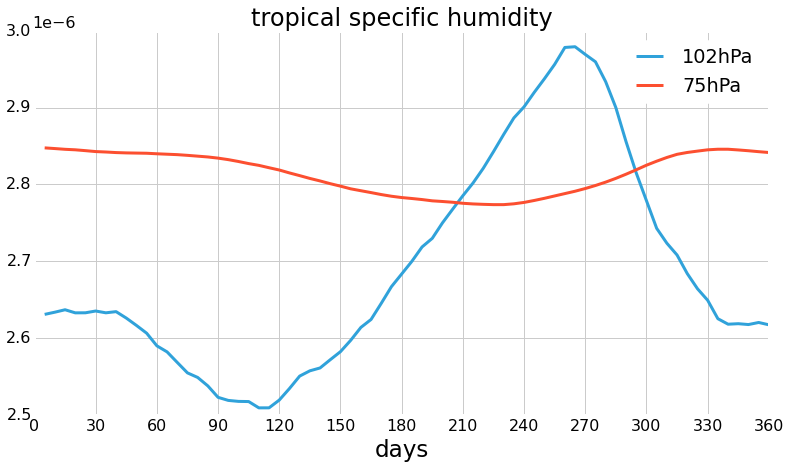

In [87]:
if do_q:
    figure()
    linecycler = cycle(lines)
    for k in K[:2]:
        plot(days,qd[:,k,Jtrop].mean(axis=-1),linestyle=next(linecycler),label=str(int(pres[k]))+'hPa')
    legend(loc='best')
    title('tropical specific humidity',fontsize=24)
    yscale('linear')
    #ylim(1.5e-6,4e-6)
    xlim(0,360)
    xticks(linspace(0,360,13))
    xlabel('days')
    savefig(savedir+'q_ttl_clim.'+fileType, bbox_inches='tight')

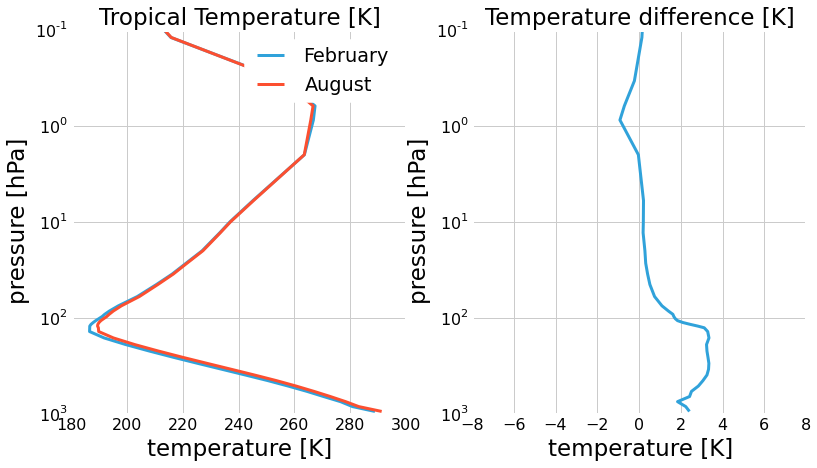

In [88]:
if do_t:
    subplot(1,2,1)
    tmtmp = tm[:,:,Jtrop].mean(axis=-1)
    plot(tmtmp[nhMonth,:],pres,label=monthNames[nhMonth])
    plot(tmtmp[shMonth,:],pres,label=monthNames[shMonth])
    legend()
    xlabel('temperature [K]')
    ylabel('pressure [hPa]')
    yscale('log')
    ylim((1000,0.1))
    title('Tropical Temperature [K]')
    subplot(1,2,2)
    plot(tmtmp[shMonth,:]-tmtmp[nhMonth,:],pres)
    xlim(-8,8)
    xlabel('temperature [K]')
    ylabel('pressure [hPa]')
    yscale('log')
    ylim((1000,0.1))
    title('Temperature difference [K]')
    savefig(savedir+'t_trop_clim.'+fileType, bbox_inches='tight')

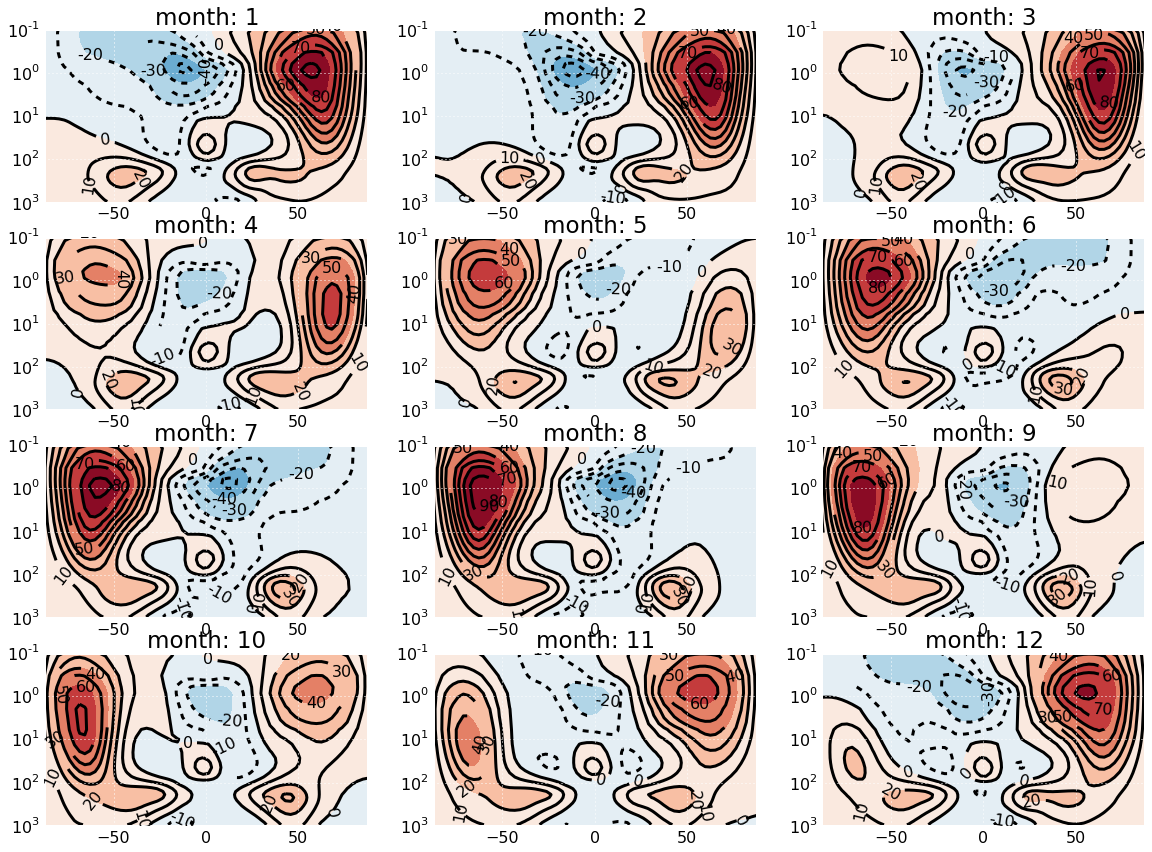

In [89]:
style.use([progdir+'notebook.mplstyle',progdir+'contourfstyle.mplstyle'])
rcParams['figure.figsize'] = (18.0, 14.0)
try:
    PlotClim(lat,pres,um,linspace(-100,100,11),linspace(-100,100,21))
    savefig(savedir+'u_clim.'+fileType, bbox_inches='tight')
except:
    pass

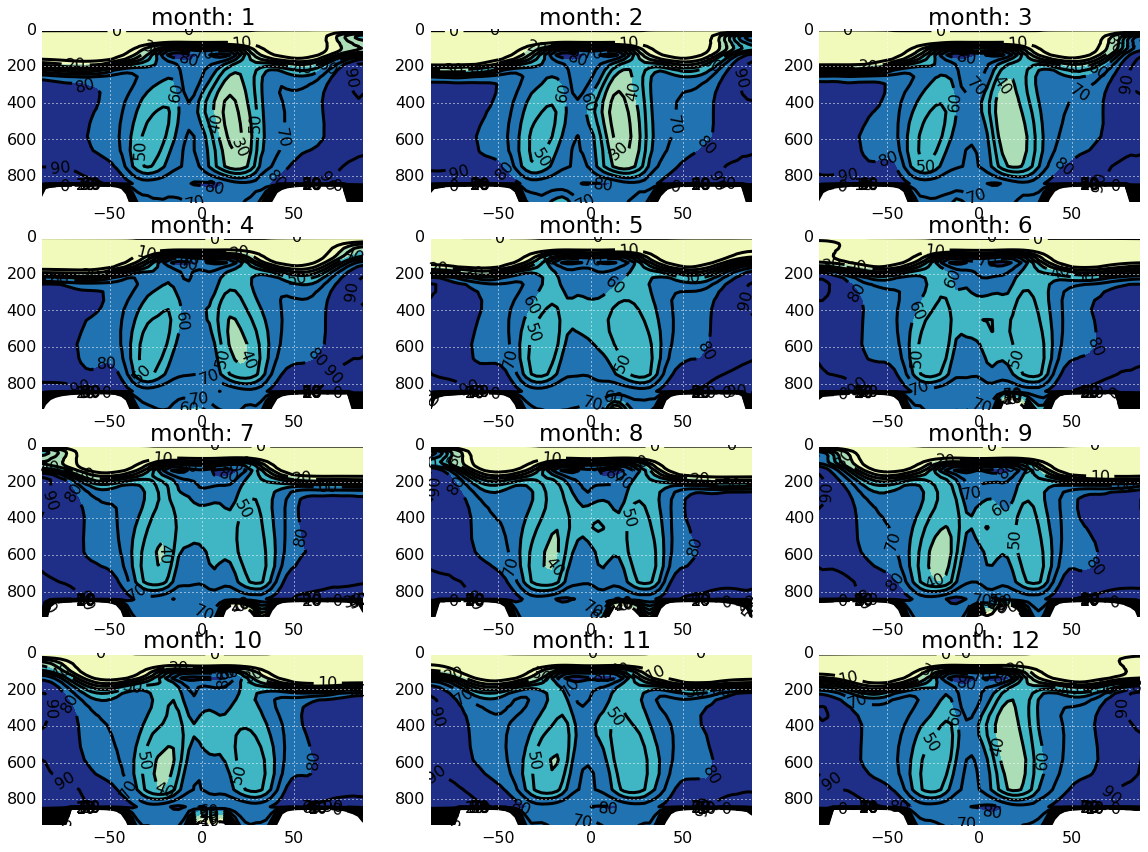

In [90]:
try:
    PlotClim(lat,pres,rhm,linspace(0,100,6),linspace(0,100,11),yscl='linear',ydir='inv',cmap='YlGnBu')
    savefig(savedir+'rh_clim.'+fileType, bbox_inches='tight')
except:
    pass

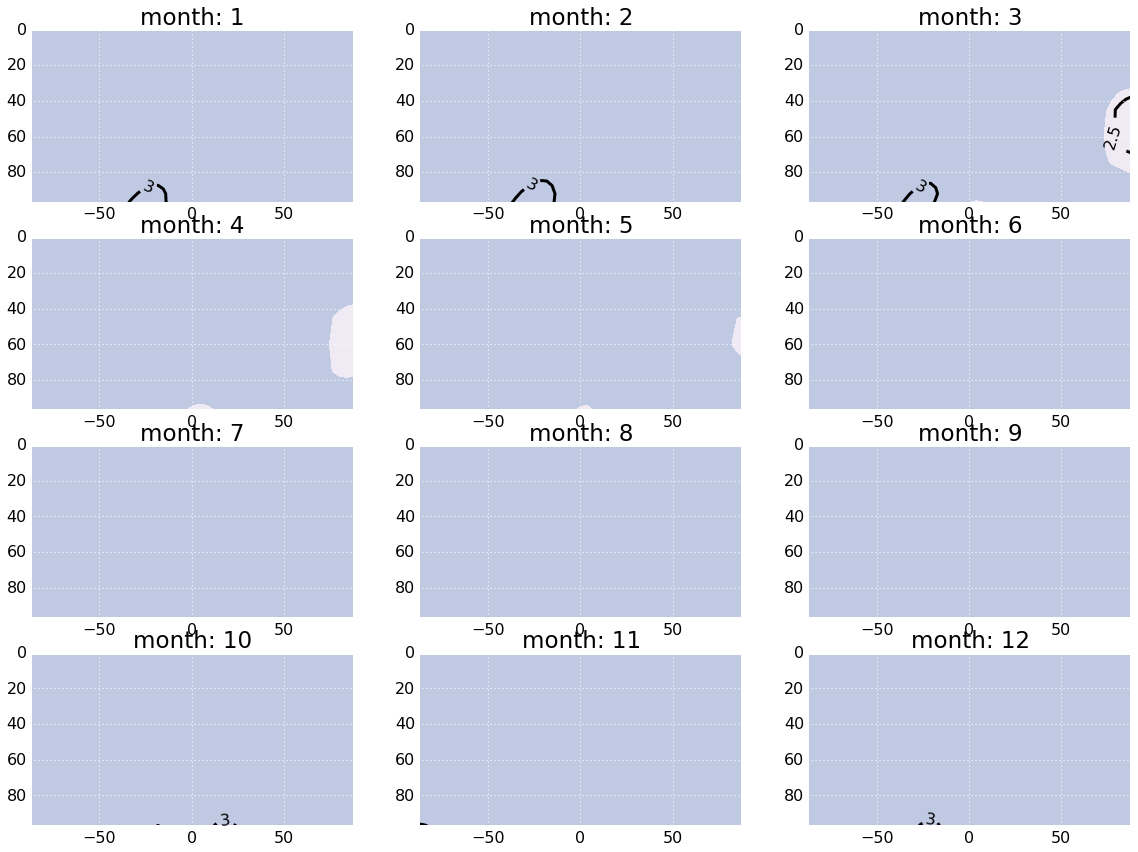

In [91]:
try:
    PlotClim(lat,pres[I],qm[:,I,:]*1.e6,linspace(2,5,6),linspace(0,5,11),yscl='linear',ydir='inv',cmap='PuBu')
    savefig(savedir+'q_clim.'+fileType, bbox_inches='tight')
except:
    pass

In [92]:
if plotPsi:
    PlotClim(lat,pres,psim/1e9,linspace(-800,800,17),linspace(-800,800,9),yscl='linear',cmap='RdBu_r')
    title('Residual circulation')
    savefig(savedir+'psi_tropo.'+fileType)

In [93]:
if plotPsi:
    PlotClim(lat,pres[I],psim[:,I,:]/1e9,linspace(-10,10,11),linspace(-10,10,11),yscl='linear',cmap='RdBu_r')
    title('Residual circulation')
    savefig(savedir+'psi_strat.'+fileType)

2.44285e-06 at 122.0 hPa


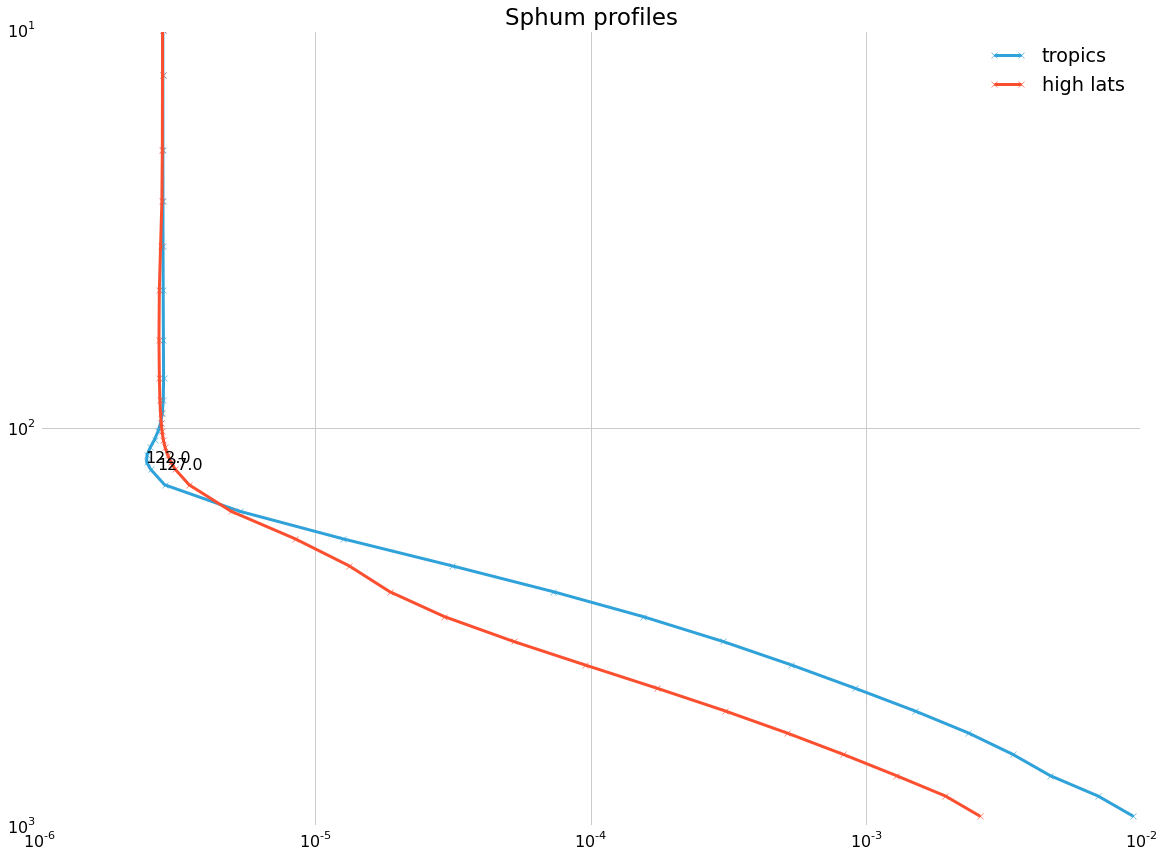

In [94]:
style.use(['fivethirtyeight',progdir+'presentation.mplstyle'])
q_tmp = qd.mean(axis=0)
q_tmp1 = q_tmp[:,Jtrop].mean(axis=-1)
q_tmp2 = q_tmp[:,lat>60].mean(axis=-1)
loglog(q_tmp1,pres,'-x',label='tropics')
loglog(q_tmp2,pres,'-x',label='high lats')
legend()
ylim(1000,10)
title('Sphum profiles')
k1 = q_tmp1.argmin()
k2 = k1+1
print q_tmp1.min(),'at',pres[k1],'hPa'
text(q_tmp1.min(),pres[k1],str(pres[k1]));
text(q_tmp2.min(),pres[k2],str(pres[k2]));